# Yelp Data Challenge 
## Part III - Clustering and PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

In [2]:
df = pd.read_csv('yelp_dataset/last_3_years_restaurant_reviews.csv')

In [3]:
df.head()

,Unnamed: 0,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
0,1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-02-14,0,VETXTwMw6qxzOVDlXfe6Tg,5,went for dinner tonight. Amazing my husband ha...,0,ymlnR8UeFvB4FZL56tCZsA
1,6,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2017-12-04,0,S8-8uZ7fa5YbjnEtaW15ng,5,This was an amazing dinning experience! ORDER ...,0,9pSSL6X6lFpY3FCRLEH3og
2,14,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-22,1,1nK5w0VNfDlnR3bOz13dJQ,5,My husband and I went there for lunch on a Sat...,1,gm8nNoA3uB4In5o_Hxpq3g
3,15,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-09-13,0,N1Z93BthdJ7FT2p5S22jIA,3,Went for a nice anniversary dinner. Researched...,0,CEtidlXNyQzgJSdF1ubPFw
4,27,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"Steakhouses, Restaurants, Cajun/Creole",4.0,0,2016-08-08,0,ir-EVhHyWna7KqYWtj660g,5,Hands down the best meal and service I have ev...,0,9_BhDyzJYf2JwTD9TyXJ4g


## 1. Cluster the review text data for all the restaurants

### Define feature variables, here is the text of the review

In [4]:
# Take the values of the column that contains review text data, save to a variable named "documents"
# removing na reviews
documents = df['text']
indx = pd.notnull(documents)
documents = documents[indx]
documents = documents.values
documents[:5]

array(["went for dinner tonight. Amazing my husband had lobster bisque and the T bone both were delish.I had the French onion soup and the pan seared duck. Cooked to perfection and I'm still raving about the flavor. If you are ever in Vegas this is a must try.",
       'This was an amazing dinning experience! ORDER THE PORK CHOP! I will definitely return.',
       "My husband and I went there for lunch on a Saturday. We had a physically exhausting week so we decided to treat ourselves. But it hasn't always been easy for our allergy whenever we ate out. So we called Delmonico ahead to see if they can accommodate our special needs. The lady who answered our call was very courteous and we felt comfortable to try after having some answers from her.\nAs we arrived, the restaurant has a comfortable ambience. I wouldn't say it is grand or special but just comfortable. When it was time to order, the server was courteous regarding our allergy too and I believe the one who took care of us was a 

### Define target variable (any categorical variable that may be meaningful)

#### For example, we are interested in perfect (5 stars) and imperfect (1-4 stars) rating

In [5]:
# Make a column and take the values, save to a variable named "target"
df['is_pos_review'] = (df['stars']>4)
df['is_pos_review'].value_counts(normalize=True)

False    0.518158
True     0.481842
Name: is_pos_review, dtype: float64

In [6]:
# Make a column and take the values, save to a variable named "target"
target = df['is_pos_review'].values
target = target[indx]
target[:10]

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True])

In [7]:
indices = df.index

#### We may want to look at the statistic of the target variable

In [8]:
# To be implemented
documents.size,target.size

(558887, 558887)

In [9]:
target.mean()

0.4818415887290275

##### Get positive reviews for clustering

In [10]:
df_pos_reviews = df[df['is_pos_review']==True].copy()

In [11]:
df_pos_reviews.shape

(269295, 14)

In [12]:
documents_pos = df_pos_reviews['text']
indx2 = pd.notnull(documents_pos)
documents_pos = documents_pos[indx2]
documents_pos = documents_pos.values
documents_pos[:5]

array(["went for dinner tonight. Amazing my husband had lobster bisque and the T bone both were delish.I had the French onion soup and the pan seared duck. Cooked to perfection and I'm still raving about the flavor. If you are ever in Vegas this is a must try.",
       'This was an amazing dinning experience! ORDER THE PORK CHOP! I will definitely return.',
       "My husband and I went there for lunch on a Saturday. We had a physically exhausting week so we decided to treat ourselves. But it hasn't always been easy for our allergy whenever we ate out. So we called Delmonico ahead to see if they can accommodate our special needs. The lady who answered our call was very courteous and we felt comfortable to try after having some answers from her.\nAs we arrived, the restaurant has a comfortable ambience. I wouldn't say it is grand or special but just comfortable. When it was time to order, the server was courteous regarding our allergy too and I believe the one who took care of us was a 

In [13]:
target_pos = df_pos_reviews['is_pos_review'].values
target_pos = target_pos[indx2]
target_pos[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [14]:
ind_pos = df_pos_reviews.index

### Create training dataset and test dataset

In [15]:
from sklearn.cross_validation import train_test_split

/Users/jieluo/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
# documents is your X, target is your y
# Now split the data to training set and test set
# You may want to start with a big "test_size", since large training set can easily crash your laptop.
documents_train,documents_test,target_train,target_test,indices_train,indices_test = train_test_split(documents,target,indices,test_size=0.2, random_state=0)

### Get NLP representation of the documents

#### Fit TfidfVectorizer with training data only, then tranform all the data to tf-idf

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
# Create TfidfVectorizer, and name it vectorizer, choose a reasonable max_features, e.g. 1000
vectorizer = TfidfVectorizer(stop_words='english',max_features=1000,min_df=1)

In [19]:
# Train the model with your training data
X_train = vectorizer.fit_transform(documents_train).toarray()

In [20]:
# Get the vocab of your tfidf
features_name = vectorizer.get_feature_names()

In [21]:
# Use the trained model to transform test
X_test = vectorizer.transform(documents_test).toarray()

In [22]:
# Use the trained model to transform all the reviews
X_all = vectorizer.transform(documents).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering with the training vectors and apply it on all the data

In [23]:
# To be implemented
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [24]:
# To be implemented
assigned_cluster_train = kmeans.predict(X_train)
assigned_cluster_test = kmeans.predict(X_test)
assigned_cluster_all = kmeans.predict(X_all)

#### Inspect the centroids
To find out what "topics" Kmeans has discovered we must inspect the centroids. Print out the centroids of the Kmeans clustering.

   These centroids are simply a bunch of vectors.  To make any sense of them we need to map these vectors back into our 'word space'.  Think of each feature/dimension of the centroid vector as representing the "average" review or the average occurances of words for that cluster.

In [25]:
# To be implemented
print("cluster centers:")
print(kmeans.cluster_centers_)

cluster centers:
[[0.00319144 0.01038693 0.00231909 ... 0.0019165  0.0031673  0.00566268]
 [0.00076087 0.00436777 0.00151902 ... 0.0010408  0.00278107 0.00700504]]


#### Find the top 10 features for each cluster.
For topics we are only really interested in the most present words, i.e. features/dimensions with the greatest representation in the centroid.  Print out the top ten words for each centroid.

* Sort each centroid vector to find the top 10 features
* Go back to your vectorizer object to find out what words each of these features corresponds to.


In [26]:
# To be implemented
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(features_name[i] for i in centroid)))

top features for each cluster:
0: good, food, place, like, just, time, ordered, order, chicken, really
1: great, food, service, place, amazing, good, best, love, friendly, vegas


#### Try different k
If we set k == to a different number, how does the top features change?

In [27]:
# To be implemented
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=5,random_state=42)
kmeans2.fit(X_train)
assigned_cluster_train2 = kmeans2.predict(X_train)
assigned_cluster_test2 = kmeans2.predict(X_test)

In [28]:
assigned_cluster_all2 = kmeans2.predict(X_all)

In [29]:
# To be implemented
top_centroids = kmeans2.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(features_name[i] for i in centroid)))

top features for each cluster:
0: food, order, time, just, service, minutes, like, came, didn, place
1: pizza, crust, good, place, great, cheese, slice, best, order, just
2: great, food, service, place, amazing, good, friendly, staff, love, definitely
3: sushi, rolls, place, roll, ayce, great, good, fresh, service, fish
4: good, place, food, chicken, like, best, vegas, delicious, really, just


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

##### Rating and reveiw of random sample using n_clusters = 2

In [30]:
# To be implemented
for i in range(kmeans.n_clusters):
    cluster = indices_test[assigned_cluster_test==i]
    sample_reviews = np.random.choice(cluster, 3, replace=False)
    print("cluster %d:" % i)
    for review in sample_reviews:
        print("rating: %f" % df.loc[review]['stars'])
        print("       %s" % df.loc[review]['text'])

cluster 0:
rating: 4.000000
       I am a fan of this little place. The pizza is like they say, "Manhattan," in style, appearance, and even a little bit in taste. (You can't really get a New York-tasting pizza without New York water, which is the trick. I say this as a native-born New Yorker.)  The people working there are wonderful, and will remember you, if not by name, then by face and voice on the telephone. The little dive is remarkably clean and put together, though nothing fancy.  The prices are what you would expect, and the portions are good. If you are in Summerlin and hankering for a pizza, (or a Gyro or Greek salad), check this place out.
rating: 1.000000
       Yuck, food is so gross here. I guess you get what you pay for because Aria cafe is so much expensive but the food is so much better
rating: 2.000000
       So disappointing: I ordered a Hell's burger to go on a Sunday afternoon. Restaurant was busy, but nothing out of the ordinary for what they are used to. The orde

##### Rating and reveiw of random sample using n_clusters=5

In [31]:
# To be implemented
for i in range(kmeans2.n_clusters):
    cluster = indices[assigned_cluster_all2==i]
    sample_reviews = np.random.choice(cluster, 3, replace=False)
    print("cluster %d:" % i)
    for review in sample_reviews:
        print("rating: %f" % df.loc[review]['stars'])
        print("       %s" % df.loc[review]['text'])

cluster 0:
rating: 1.000000
       Worst Mediterranean food ever!  I would eat Mediterranean food ANYWHERE ELSE but here.  My friend and I both ordered a platter each and some hummus,  everything was dry and not tasty.   We left disappointed and angry at how bad the food was.
rating: 3.000000
       My husband and I truly enjoy eating our dinner at the beautiful bar at least once a week.  In the past few months we have been turned off by the very loud singer that starts at 5pm.  She is good, good and LOUD!  The servers are having a difficult time hearing the customers and the customers have a difficult time carrying on a normal conversation.  Last time we were there a few weeks ago, I used earplugs.   We went to Red Rock on Thursday to eat at TBones, started in the door and quickly made a U Turn due to the high sound volume of the singer.  We ended up having a nice meal at the bar in Libre.  This was the same scenario as last week.  I'm sorry to say until the music sound level is dropp

## 2. Cluster positive reviews

In [32]:
doc_pos_train,doc_pos_test,target_pos_train,target_pos_test,ind_pos_train,ind_pos_test = train_test_split(documents_pos,target_pos,ind_pos,test_size=0.2, random_state=0)

In [33]:
vectorizer = TfidfVectorizer(stop_words='english',max_features=1000,min_df=1)
X_pos_train = vectorizer.fit_transform(doc_pos_train).toarray()
features_name = vectorizer.get_feature_names()
X_pos_all = vectorizer.transform(documents_pos).toarray()

In [34]:
# To be implemented
from sklearn.cluster import KMeans
kmeans_pos = KMeans(n_clusters=2,random_state=42)
kmeans_pos.fit(X_pos_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [35]:
assigned_cluster_all_pos = kmeans_pos.predict(X_pos_all)

In [36]:
# To be implemented
print("cluster centers:")
print(kmeans_pos.cluster_centers_)

cluster centers:
[[0.00149808 0.00784167 0.00228761 ... 0.00142401 0.00474485 0.00827277]
 [0.00070676 0.00495421 0.00149898 ... 0.00115746 0.00208424 0.00602964]]


In [37]:
# To be implemented
top_centroids = kmeans_pos.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(features_name[i] for i in centroid)))

top features for each cluster:
0: place, good, food, best, vegas, delicious, amazing, time, love, just
1: great, food, service, place, amazing, good, friendly, staff, excellent, awesome


In [38]:
# To be implemented
for i in range(kmeans_pos.n_clusters):
    cluster = ind_pos[assigned_cluster_all_pos==i]
    sample_reviews = np.random.choice(cluster, 3, replace=False)
    print("cluster %d:" % i)
    for review in sample_reviews:
        print("rating: %f" % df_pos_reviews.loc[review]['stars'])
        print("category: %s" % df_pos_reviews.loc[review]['categories'])
        print("       %s" % df_pos_reviews.loc[review]['text'])

cluster 0:
rating: 5.000000
category: Asian Fusion, Lounges, Bars, Beer Bar, Barbeque, Restaurants, Nightlife, Karaoke
       This karaoke place is hands down the best. Best service, cool rooms, cheap drinks. Good times all around
rating: 5.000000
category: American (Traditional), Restaurants, Burgers, Breakfast & Brunch, Sandwiches
       Excellent customer service from the time we were greeted until we left. Close enough to the strip to make the drive but far enough to avoid the traffic
rating: 5.000000
category: Steakhouses, Restaurants
       Being an unabashed carnivore who has a passion for the fascinating ,and sometimes sordid, history of Las Vegas, The Steakhouse at Circus Circus was a truly memorable experience that seems to have been tailor made for me!

(OK, I just flashed back to the Yelp! South Park episode where Kyle's dad goes into these long winded and terrifically verbose reviews. My bad.)

Anyways, back to this incredible experience! 

Having to navigate through Circu

In [39]:
# To be implemented
from sklearn.cluster import KMeans
kmeans_pos2 = KMeans(n_clusters=8,random_state=42)
kmeans_pos2.fit(X_pos_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [40]:
assigned_cluster_all_pos2 = kmeans_pos2.predict(X_pos_all)

In [41]:
# To be implemented
print("cluster centers:")
print(kmeans_pos2.cluster_centers_)

cluster centers:
[[0.00133112 0.00705644 0.00112206 ... 0.00078635 0.00347322 0.00892395]
 [0.00065473 0.00460263 0.00130378 ... 0.00085926 0.0038552  0.00955339]
 [0.00081926 0.00626467 0.00262472 ... 0.00076167 0.00275436 0.0040928 ]
 ...
 [0.00140347 0.00829766 0.00170679 ... 0.00133009 0.00697045 0.01048099]
 [0.00135864 0.00656347 0.00147546 ... 0.00115138 0.00327202 0.00763664]
 [0.00167766 0.00832237 0.00244365 ... 0.00179992 0.00473582 0.00848677]]


In [42]:
# To be implemented
top_centroids = kmeans_pos2.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(features_name[i] for i in centroid)))

top features for each cluster:
0: breakfast, great, place, food, good, eggs, service, vegas, coffee, delicious
1: love, place, food, great, good, service, amazing, friendly, staff, time
2: best, vegas, food, las, ve, place, service, amazing, restaurant, time
3: great, food, service, place, amazing, good, awesome, friendly, definitely, excellent
4: sushi, place, great, roll, rolls, fresh, ayce, service, good, eat
5: chicken, fried, good, food, rice, place, great, delicious, ordered, amazing
6: pizza, great, crust, place, good, best, delicious, service, cheese, amazing
7: good, food, place, delicious, amazing, time, like, just, really, service


In [43]:
# To be implemented
for i in range(kmeans_pos2.n_clusters):
    cluster = ind_pos[assigned_cluster_all_pos2==i]
    sample_reviews = np.random.choice(cluster, 3, replace=False)
    print("cluster %d:" % i)
    for review in sample_reviews:
        print("rating: %f" % df_pos_reviews.loc[review]['stars'])
        print("category: %s" % df_pos_reviews.loc[review]['categories'])
        print("       %s" % df_pos_reviews.loc[review]['text'])

cluster 0:
rating: 5.000000
category: Food, Fruits & Veggies, Restaurants, Specialty Food, Vegan, Gluten-Free, Juice Bars & Smoothies, Comfort Food, Organic Stores
       Visiting Vegas for the pool party scene and needed fuel after a long day in the sun.  Found Go Vegan Cafe online and so stoked we did.  Everything on the menu is plant based, if you're not a vegan or vegetarian don't be turned off by that fact.  I guarantee regardless of your diet you'll find something great to eat.

John was our server and he was very courteous and chill.  I had the breakfast burrito and it was amazing.  Fresh veggies, tasty sausage and fresh guac.  Awesome!

Check this place out. Reasonably priced and tons of options.
rating: 5.000000
category: Steakhouses, Breakfast & Brunch, Restaurants, French
       I always enjoy breakfast under the Eiffel Tower when I visit Las Vegas!  The food and service is always fantastic and you can't beat the location at Paris across from the Bellagio!  I highly recommen

## 3. Cluster all the reviews of the most reviewed restaurant
Let's find the most reviewed restaurant and analyze its reviews

In [44]:
df['review_cnt'] = df.groupby(['business_id'])['review_id'].transform('count')
df['review_cnt'].quantile(q=[0.5,0.75,0.90])

0.50     292.0
0.75     609.0
0.90    1289.0
Name: review_cnt, dtype: float64

In [45]:
# Find the business who got most reviews, get your filtered df, name it df_top_restaurant
df_top_restaurant = df[df['review_cnt']== df['review_cnt'].max()].copy()

In [46]:
df_top_restaurant['business_id'].value_counts()

RESDUcs7fIiihp38-d6_6g    4227
Name: business_id, dtype: int64

In [47]:
df_top_restaurant.shape

(4227, 15)

### Vectorize the text feature

In [48]:
# Take the values of the column that contains review text data, save to a variable named "documents_top_restaurant"
documents_top_restaurant = df_top_restaurant['text'].values

### Define target variable (for later classification use)

#### Again, we look at perfect (5 stars) and imperfect (1-4 stars) rating

In [49]:
# To be implemented
df_top_restaurant['is_pos_review'] = (df_top_restaurant['stars']>4)
df_top_restaurant['is_pos_review'].value_counts(normalize=True)
target_top_restaurant = df_top_restaurant['is_pos_review'].values

#### Check the statistic of the target variable

In [50]:
# To be implemented
target_top_restaurant.shape,documents_top_restaurant.shape

((4227,), (4227,))

In [51]:
indices_top_restaurant = df_top_restaurant.index

### Create training dataset and test dataset

In [52]:
from sklearn.cross_validation import train_test_split

In [53]:
# documents_top_restaurant is your X, target_top_restaurant is your y
# Now split the data to training set and test set
# Now your data is smaller, you can use a typical "test_size", e.g. 0.3-0.7
doc_top_train,doc_top_test,tar_top_train,tar_top_test,ind_top_train,ind_top_test = train_test_split(documents_top_restaurant,target_top_restaurant,indices_top_restaurant,test_size=0.3,random_state=0)

### Get NLP representation of the documents

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
# Create TfidfVectorizer, and name it vectorizer
top_vectorizer = TfidfVectorizer(stop_words='english',max_features=1000,min_df=1)

In [56]:
# Train the model with your training data
X_train_top=top_vectorizer.fit_transform(doc_top_train).toarray()

In [57]:
# Get the vocab of your tfidf
top_features_name = top_vectorizer.get_feature_names()

In [58]:
# Use the trained model to transform the test data
X_test_top=top_vectorizer.transform(doc_top_test).toarray()

In [59]:
# Use the trained model to transform all the data
X_all_top=top_vectorizer.transform(documents_top_restaurant).toarray()

### Cluster reviews with KMeans

#### Fit k-means clustering on the training vectors and make predictions on all data

In [60]:
# To be implemented
from sklearn.cluster import KMeans
kmeans_top = KMeans(n_clusters=2,random_state=42)
kmeans_top.fit(X_train_top)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

#### Make predictions on all your data

In [61]:
# To be implemented
assigned_cluster_all_top = kmeans_top.predict(X_all_top)

#### Inspect the centroids

In [62]:
# To be implemented
print("cluster centers:")
print(kmeans_top.cluster_centers_)

cluster centers:
[[0.00412316 0.00798633 0.00248271 ... 0.00946455 0.00261443 0.00531457]
 [0.00368822 0.01001068 0.00309549 ... 0.00552936 0.0018602  0.00306911]]


#### Find the top 10 features for each cluster.

In [63]:
# To be implemented
top_centroids = kmeans_top.cluster_centers_.argsort()[:,-1:-11:-1]
print("top features for each cluster:")
for num, centroid in enumerate(top_centroids):
    print("%d: %s" % (num, ", ".join(top_features_name[i] for i in centroid)))

top features for each cluster:
0: crab, buffet, good, legs, food, seafood, dessert, section, really, like
1: food, buffet, vegas, best, wait, great, line, time, place, worth


#### Print out the rating and review of a random sample of the reviews assigned to each cluster to get a sense of the cluster.

In [64]:
# To be implemented
for i in range(kmeans_top.n_clusters):
    cluster = indices_top_restaurant[assigned_cluster_all_top==i]
    sample_reviews = np.random.choice(cluster, 3, replace=False)
    print("cluster %d:" % i)
    for review in sample_reviews:
        print("rating: %f" % df_top_restaurant.loc[review]['stars'])
        print("       %s" % df_top_restaurant.loc[review]['text'])

cluster 0:
rating: 3.000000
       Food was decent and I only thought the seafood station was remarkable. Honestly, I spent most of my time thinking about how I had to eat $63 worth of food to break-even on the cost. 

The oysters and snow crab/king crab legs were gigantic and tasted very fresh. The desserts were pretty good too, I loved the key lime tart and Thai tea boba float. Also, my friends surprised me with their birthday platter! It was a cute plate of desserts, mostly chocolate-based.
rating: 4.000000
       Came here for the dinner buffet. Make sure to come in early, you can also check in at the kiosk, it will print out what time you can come back and they will text you too if your group is ready to be seated. They have a good selection of food. My favorite part of the buffet is the boiled crab legs and the dessert station.
rating: 3.000000
       I have to give this one a 3, just because I didn't feel the price was worth the buffet and line waiting experience (unless you're 

## 4. Use PCA to reduce dimensionality

### Stardardize features
Our X_train and X_test

In [65]:
from sklearn.preprocessing import StandardScaler

# To be implemented
scaler = StandardScaler()

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

### Use PCA to transform data (train and test) and get princial components

In [66]:
from sklearn.decomposition import PCA

# Let's pick a n_components
n_col = 50

# To be implemented
pca = PCA(n_components = n_col)

# fit: get V, lambda; transform: X_train*V
train_components = pca.fit_transform(X_scaled_train)
test_components = pca.transform(X_scaled_test)

In [67]:
print(train_components.shape)
print(test_components.shape)

(447109, 50)
(111778, 50)


In [68]:
print(pca.components_.shape)

(50, 1000)


### See how much (and how much percentage of) variance the principal components explain

In [69]:
# To be implemented
print(pca.explained_variance_.shape)
print(pca.explained_variance_)

(50,)
[5.44949445 4.36027039 3.28665345 2.86362831 2.70597152 2.66258404
 2.5177551  2.42454681 2.30137099 2.27095639 2.24358496 2.12966933
 2.1104271  2.03455141 1.98356495 1.97834234 1.92760285 1.89002463
 1.84993463 1.8352179  1.81860312 1.76591115 1.75806013 1.72667453
 1.67206902 1.66246485 1.633791   1.61551523 1.60819987 1.58350221
 1.57349661 1.55516431 1.53674984 1.52485303 1.50045593 1.48888973
 1.47380701 1.47054541 1.45627478 1.44051785 1.43189716 1.42477495
 1.40541932 1.39211349 1.3859738  1.35819722 1.34491786 1.3296711
 1.32195803 1.29750056]


In [70]:
# To be implemented
print(pca.explained_variance_ratio_.shape)
print(pca.explained_variance_ratio_)

(50,)
[0.00544948 0.00436026 0.00328665 0.00286362 0.00270597 0.00266258
 0.00251775 0.00242454 0.00230137 0.00227095 0.00224358 0.00212966
 0.00211042 0.00203455 0.00198356 0.00197834 0.0019276  0.00189002
 0.00184993 0.00183521 0.0018186  0.00176591 0.00175806 0.00172667
 0.00167207 0.00166246 0.00163379 0.00161551 0.0016082  0.0015835
 0.00157349 0.00155516 0.00153675 0.00152485 0.00150045 0.00148889
 0.0014738  0.00147054 0.00145627 0.00144051 0.00143189 0.00142477
 0.00140542 0.00139211 0.00138597 0.00135819 0.00134491 0.00132967
 0.00132196 0.0012975 ]


### Viz: plot proportion of variance explained with top principal components

For clear display, you may start with plotting <=20 principal components

In [71]:
# To be implemented
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Text(0,0.5,u'Variance Explained')

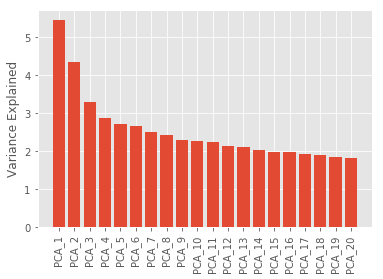

In [72]:
# To be implemented
pca_range = np.arange(20) + 1
explained_var_top20 = pca.explained_variance_[:20]

pca_names = ['PCA_%s' % i for i in pca_range]

plt.bar(pca_range, explained_var_top20, align='center')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

plt.ylabel('Variance Explained')

Text(0,0.5,u'Proportion of Variance Explained')

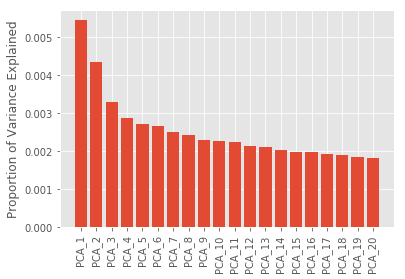

In [73]:
# To be implemented
pca_range = np.arange(20) + 1
explained_var_top20 = pca.explained_variance_ratio_[:20]

pca_names = ['PCA_%s' % i for i in pca_range]

plt.bar(pca_range, explained_var_top20, align='center')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

plt.ylabel('Proportion of Variance Explained')

## Classifying positive/negative review with PCA preprocessing

### Helper Function

In [74]:
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score,roc_auc_score

In [75]:
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [76]:
#helper function to plot roc curve
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [77]:
# helper function to train models
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### Logistic Regression Classifier
#### Use standardized tf-idf vectors as features

In [78]:
# Build a Logistic Regression Classifier, train with standardized tf-idf vectors

from sklearn.linear_model import LogisticRegression

# To be implemented
clf_lrc = LogisticRegression()

clf_lrc.fit(X_scaled_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.904200  0.903739
Accuracy   0.823215  0.822988
Precision  0.808597  0.810161
Recall     0.829105  0.827591
f1-score   0.818723  0.818783


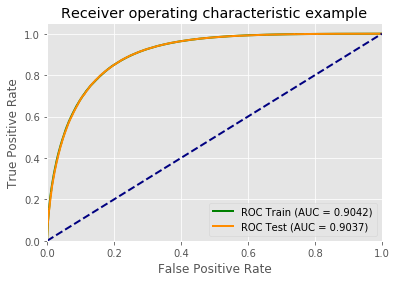

In [79]:
# Get score for training set & test set
train_test_model(clf_lrc, X_scaled_train, target_train, X_scaled_test, target_test)

#### Use (Stardardized + PCA) tf-idf vectors as features

In [80]:
# Build a Logistic Regression Classifier, train with PCA tranformed X

from sklearn.linear_model import LogisticRegression

# To be implemented
clf_lrc_pca = LogisticRegression()

clf_lrc_pca.fit(X_scaled_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

              train      test
metrics                      
AUC        0.885752  0.887952
Accuracy   0.804077  0.807261
Precision  0.789240  0.794378
Recall     0.809187  0.811057
f1-score   0.799089  0.802631


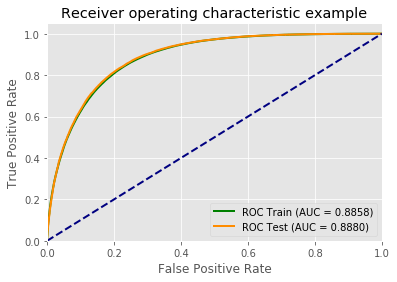

In [81]:
# Get score for training set & test set
train_test_model(clf_lrc_pca, train_components, target_train, test_components, target_test)

#### Q: What do you see from the training score and the test score? How do you compare the results from PCA and non-PCA preprocessing?

##### Answer: 
1. In terms of running time, when using PCA preprocessing features to fit logistic model, it's much faster than non-PCA ones. The reason is that some data information is missing after PCA processing.
2. In terms of scores(metrics), the PCA ones has lower scores. Comparing the difference between train score and testing score, PCA results has larger gap between test and train. One way to explain is that the model is likely to be overfitting, and thus larger gap between training metric and testing metric. 

#### You can plot the coefficients against principal components


In [82]:
# To be implemented
clf_lrc_pca.coef_[0]

array([-0.67527335, -0.07678168,  0.40578055, -0.17002506,  0.06806783,
       -0.46609811, -0.32553711, -0.2129535 , -0.02244735,  0.38147949,
        0.22692971,  0.0283095 ,  0.15839265,  0.07081957,  0.05934944,
        0.09549491, -0.15031756, -0.05958701,  0.00167373,  0.0134592 ,
       -0.05036382,  0.01893647, -0.22443385, -0.12746982,  0.08157187,
       -0.10017953, -0.02436081,  0.1273737 , -0.01877323,  0.05639671,
        0.03980726, -0.07823129,  0.02372126, -0.01190005, -0.09235316,
        0.04547653,  0.01186553, -0.06672264, -0.01538067,  0.03546617,
        0.03689038,  0.03624073,  0.04727058, -0.06908692,  0.02484438,
       -0.03537904, -0.13931215, -0.08209837,  0.10809152, -0.0087252 ])

Text(0,0.5,u'Coefficients')

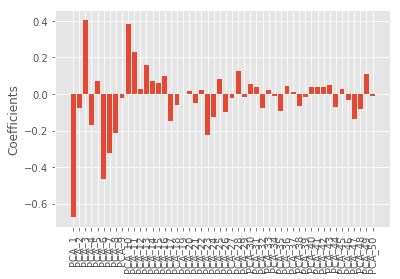

In [83]:
# To be implemented
pca_range = np.arange(50) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

plt.bar(pca_range, clf_lrc_pca.coef_[0], align='center')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

plt.ylabel('Coefficients')

### Random Forest Classifier
#### Use standardized tf-idf vectors as features

In [84]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
clf_rfc = RandomForestClassifier(max_depth=20, n_estimators=10, min_samples_leaf=100)

clf_rfc.fit(X_scaled_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.854964  0.851025
Accuracy   0.773516  0.770930
Precision  0.758733  0.757180
Recall     0.776570  0.774213
f1-score   0.767548  0.765601


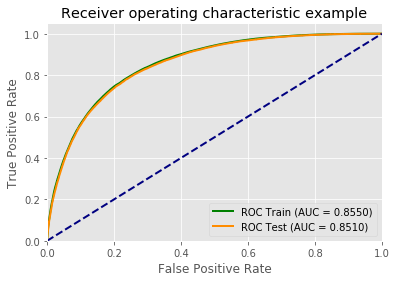

In [85]:
# Get score for training set & test set
train_test_model(clf_rfc, X_scaled_train, target_train, X_scaled_test, target_test)

#### Use (Stardardized + PCA) tf-idf vectors as features

In [86]:
# Build a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# To be implemented
clf_rfc_pca = RandomForestClassifier(max_depth=20, n_estimators=10, min_samples_leaf=100)

clf_rfc_pca.fit(train_components, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.886215  0.868148
Accuracy   0.799635  0.784153
Precision  0.786781  0.773323
Recall     0.800928  0.782729
f1-score   0.793792  0.777998


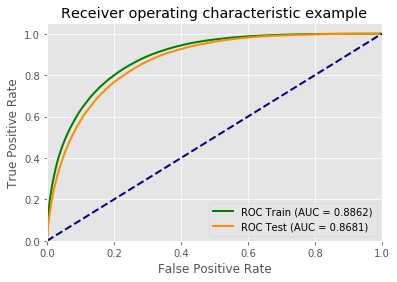

In [87]:
# Get score for training set & test set
train_test_model(clf_rfc_pca, train_components, target_train, test_components, target_test)

#### Q: What do you see from the training result and the test result?

##### Answer: 
1. In terms of running time, when using PCA preprocessing features to fit logistic model, it's much faster than non-PCA ones. The reason is that some data information is missing after PCA processing.
2. In terms of scores(metrics), the PCA ones has higher scores. Comparing the difference between train score and testing score, PCA results has larger gap between test and train. One way to explain is that the model is likely to be overfitting, and thus larger gap between training metric and testing metric.

#### We can plot the feature importances against principal components


In [88]:
# To be implemented
clf_rfc_pca.feature_importances_

array([0.40342457, 0.03071649, 0.10001541, 0.02846699, 0.01009572,
       0.10817584, 0.0542683 , 0.03056815, 0.00599734, 0.06336075,
       0.01571544, 0.00400652, 0.01017068, 0.00526184, 0.00351969,
       0.00705491, 0.0081436 , 0.00636749, 0.0034519 , 0.00216531,
       0.00343625, 0.00211406, 0.01616753, 0.00647359, 0.00297649,
       0.00476321, 0.00242095, 0.00339533, 0.00401068, 0.00325879,
       0.00236159, 0.00277013, 0.00385414, 0.00278285, 0.00775533,
       0.0027986 , 0.00188916, 0.0016999 , 0.00156412, 0.00157669,
       0.00212216, 0.00138965, 0.00146274, 0.00166543, 0.00188138,
       0.00126533, 0.00330999, 0.00194109, 0.00448214, 0.00146377])

Text(0,0.5,u'feature importance')

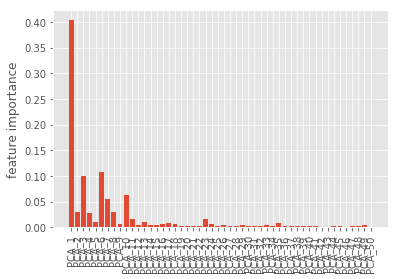

In [89]:
pca_range = np.arange(50) + 1

pca_names = ['PCA_%s' % i for i in pca_range]

plt.bar(pca_range, clf_rfc_pca.feature_importances_, align='center')

xticks = plt.xticks(pca_range, pca_names, rotation=90)

plt.ylabel('feature importance')